In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

from sklearn import preprocessing
from seaborn import pairplot

In [2]:
best_bar = pd.read_csv('flavors_of_cacao.csv',
                       sep=',', header=0, names=['company', 'bar_name','ref', 'rew_date', 'percent', 'company_loc', 'rate', 'bean_dtype', 'bean_orig'])

In [3]:
original = best_bar[['company_loc', 'rate', 'percent', 'bean_orig']]

# сортируем, убираем лишнее (группы по странам, где мало информации, неправильное нарзвание этих стран)

bar = original[original.bean_orig != '\xa0']
bar = bar.dropna(how = 'any')

barBeans = bar['bean_orig']

smallOrigin = barBeans.value_counts() < 5
newBeanOrig = barBeans.apply(lambda x: smallOrigin[x])
beanOrig = barBeans.mask(newBeanOrig, 'other')

bar = bar.assign(bean_orig = beanOrig)

print(bar)

     company_loc  rate percent           bean_orig
0         France  3.75     63%            Sao Tome
1         France  2.75     70%               other
2         France  3.00     70%               other
3         France  3.50     70%               other
4         France  3.50     70%                Peru
5         France  2.75     70%           Venezuela
6         France  3.50     70%                Cuba
7         France  3.50     70%           Venezuela
8         France  3.75     70%           Venezuela
9         France  4.00     70%                Peru
10        France  2.75     70%              Panama
11        France  3.00     70%          Madagascar
12        France  3.25     70%              Brazil
13        France  3.75     70%             Ecuador
14        France  2.75     70%            Colombia
15        France  3.00     70%               other
16        France  3.25     70%    Papua New Guinea
17        France  4.00     70%           Venezuela
18        France  3.25     70% 

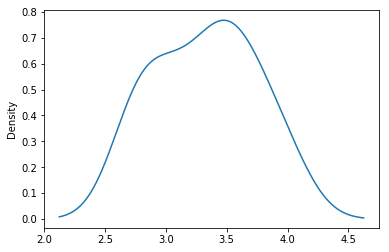

In [4]:
bar.iloc[:20].rate.plot.kde()

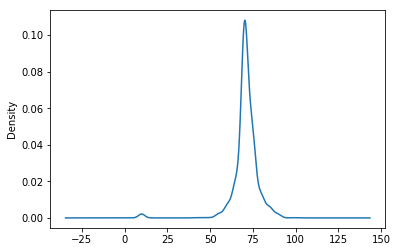

In [5]:
berPercent = bar.percent.apply(lambda x: float(x[:2]))
# berPercent = berPercent.divide(10)
berPercent.plot.kde()


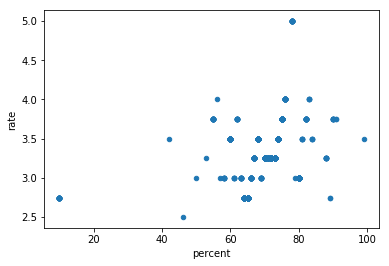

In [6]:
#rate = bar.rate.mul(10)
berFrame = pd.Series(index = berPercent, data = bar.rate).to_frame()
berFrame.reset_index(inplace=True)
berFrame.columns = ['percent','rate']
berFrame = berFrame.dropna(how = 'any')

berFrame.plot(kind='scatter', x='percent', y='rate')


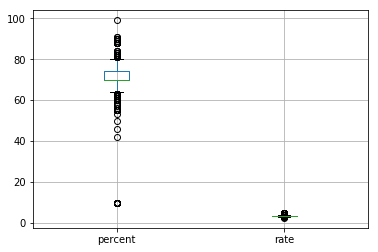

In [7]:
berFrame.boxplot()

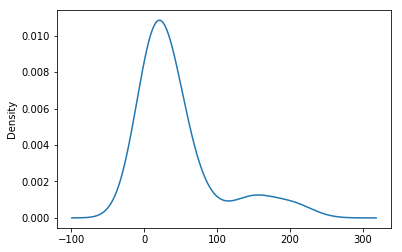

In [8]:
berBeanOrigUnique = bar.bean_orig.value_counts()
maskValue = bar.bean_orig.unique()

berBeanOrigUnique = berBeanOrigUnique.dropna(how = 'any')
berBeanOrigUnique.plot(kind='kde')

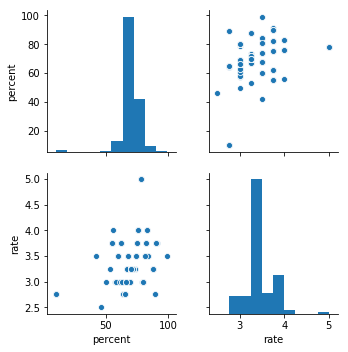

In [9]:
pairplot(berFrame)

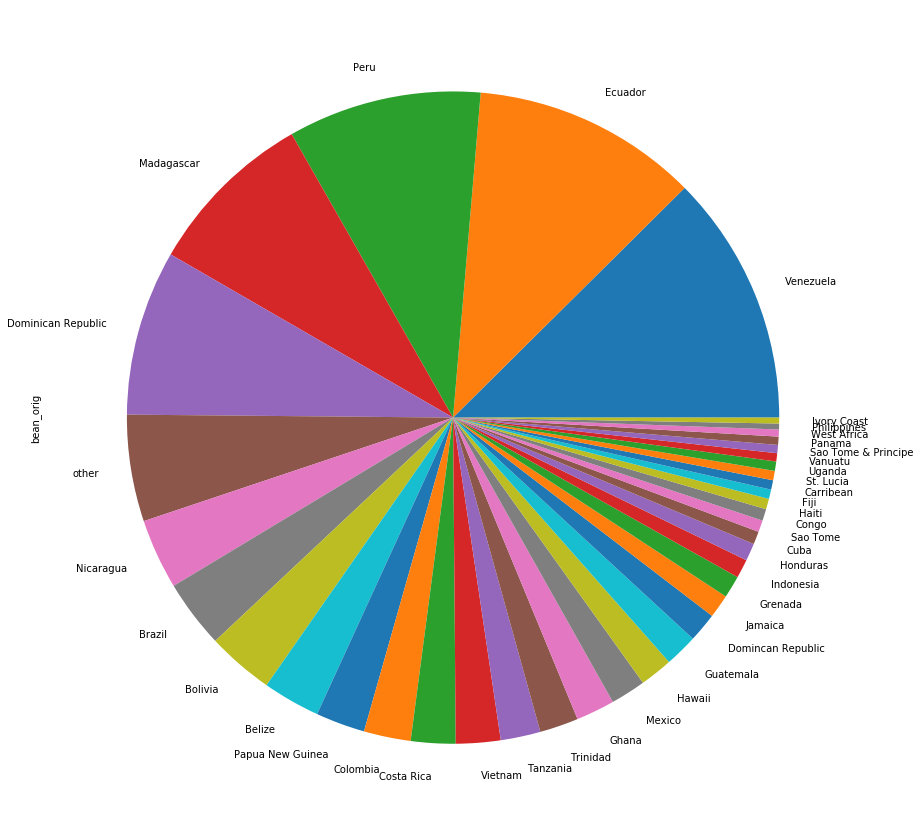

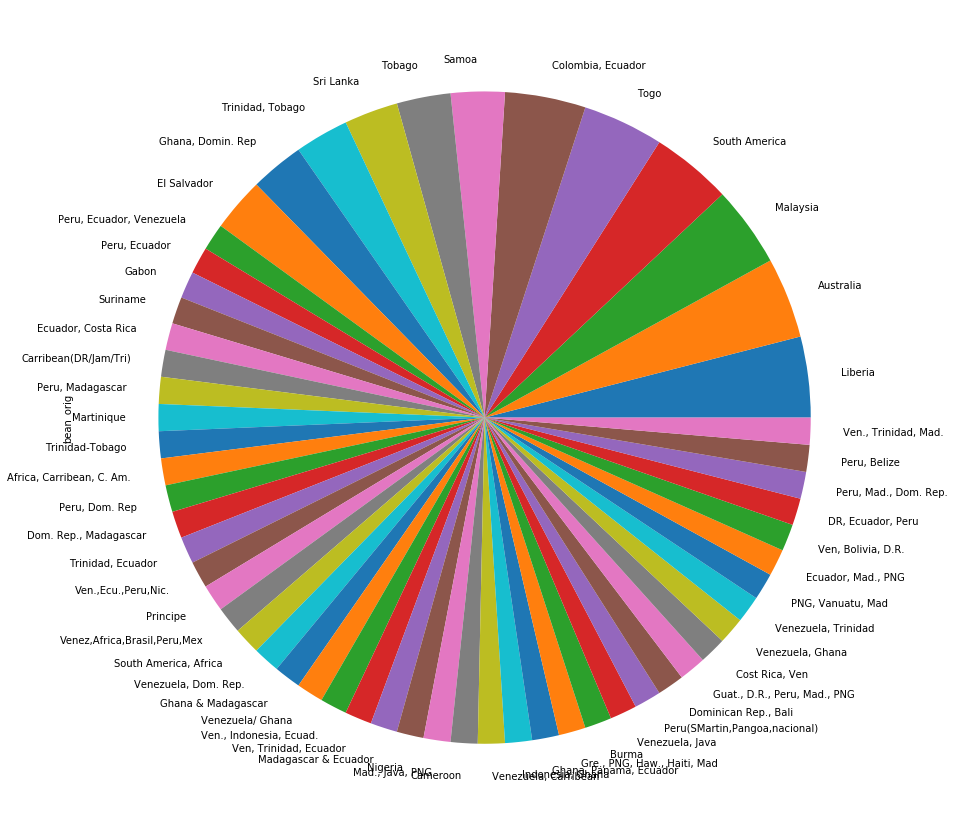

In [10]:
valueCounts = bar.bean_orig.value_counts()

berBeanOrigUnique = valueCounts[valueCounts > 4]
berBeanOrigUnique.plot.pie(figsize=(15, 15))
plt.show()


origValue = original.bean_orig.value_counts()
asasas = origValue[origValue < 4]
asasas.plot.pie(figsize=(15, 15))
plt.show()

In [11]:
# группируем, сортируем
groupedAndSorted = bar.groupby('bean_orig')['rate'].mean().sort_values(ascending=False)
groupedAndSorted.head(5)

# for key, item in groupedAndSorted:
#     group = groupedAndSorted.get_group(key)
#     print(groupedAndSorted.get_group(key), '\n\n')


bean_orig
Haiti        3.388889
Honduras     3.350000
Congo        3.325000
Guatemala    3.321429
Vietnam      3.315789
Name: rate, dtype: float64

In [12]:
companyRate = bar.groupby('company_loc')['rate'].mean().sort_values(ascending=False)
companyRate.head(5)


company_loc
Chile          3.75
Amsterdam      3.50
Netherlands    3.50
Poland         3.50
Philippines    3.50
Name: rate, dtype: float64